# 技術者のための線形代数学 1章 デモ
1. 1次変換
    + 行列の要素を色々変更するとどうなるか

2. 固有値関連の内容

3. 最小二乗法

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# 1次変換

## 画像を回転させる
+ 回転行列$R(\theta)$は
$$
R(\theta) = \left[\begin{array}{cc}
    \cos(\theta) & -\sin(\theta) \\
    \sin(\theta) & \cos(\theta) \\
\end{array}\right]
$$
特に$(a,b)$周りで回転したとき、回転先の位置$(x', y')$は
$$
\left[\begin{array}{c}
    x' \\
    y' \\
\end{array}\right] = 
\left[\begin{array}{cc}
    \cos(\theta) & -\sin(\theta) \\
    \sin(\theta) & \cos(\theta) \\
\end{array}\right]
\left[\begin{array}{c}
    x - a \\
    y - b \\
\end{array}\right]
+
\left[\begin{array}{c}
    a \\
    b \\
\end{array}\right]
$$
+ ** 画像の行き先をドット上にしてするため四捨五入しているので割と粗いです **

In [3]:
np.random.seed(20191012)
X = np.random.normal(size = (100, 100))

In [4]:
X = np.array([[1,1,1],[0,0,1],[0,0,1]])

In [5]:
X = np.array([[0,0,0,0,0,0,0],[0,1,1,1,1,1,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,0,0,0]])
(pos_x, pos_y) = np.where(X == 1)

In [21]:
theta = np.pi / 5
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
offset_x = 3
offset_y = 3

In [40]:
offset_x = 3
offset_y = 3

In [43]:
def im_rotate(theta, offset_x, offset_y):
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    pos_dash = np.zeros((len(pos_x), 2))
    X_dash = np.zeros(X.shape)
    for i, (i_pos_x, i_pos_y) in enumerate(zip(pos_x, pos_y)):
        pos_dash[i,:] = np.round(R @ np.array([i_pos_x - offset_x, i_pos_y - offset_y])) + np.array([offset_x, offset_y])
        
    for i in range(len(pos_x)):
        X_dash[int(pos_dash[i,0]), int(pos_dash[i,1])] = X[pos_x[i], pos_y[i]]
    
    plt.imshow(X)
    plt.show()
    
    plt.imshow(X_dash)
    plt.show()

In [44]:
interact(im_rotate, theta=(-np.pi, np.pi+0.1, 0.1*np.pi), offset_x = (0, 7, 1), offset_y=(0, 7, 1))

interactive(children=(FloatSlider(value=0.0, description='theta', max=3.241592653589793, min=-3.14159265358979…

<function __main__.im_rotate(theta, offset_x, offset_y)>

In [22]:
# pos = np.array(list(itertools.product(np.arange(0,4), np.arange(0,4))))
pos_dash = np.zeros((len(pos_x), 2))
X_dash = np.zeros(X.shape)
for i, (i_pos_x, i_pos_y) in enumerate(zip(pos_x, pos_y)):
    pos_dash[i,:] = np.round(R @ np.array([i_pos_x - offset_x, i_pos_y - offset_y])) + np.array([offset_x, offset_y])
#     print((i_pos_x, i_pos_y), i_pos_dash)
#     pos_dash[i,:] = np.round(R @ i_pos)
#     X_dash[int(pos_dash[i,0]), int(pos_dash[i,1])] = X[int(i_pos[0]-3), int(i_pos[1]-3)]

In [23]:
# offset_pos_dash = pos_dash - pos_dash.min(axis = 0)
pos_dash_x = pos_dash[:,0]
pos_dash_y = pos_dash[:,1]

In [25]:
for i in range(len(pos_x)):
    X_dash[int(pos_dash_x[i]), int(pos_dash_y[i])] = X[pos_x[i], pos_y[i]]

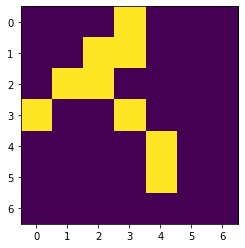

In [26]:
plt.imshow(X_dash)
plt.show()

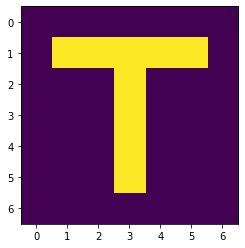

In [27]:
plt.imshow(X)
plt.show()

# 固有値関連の内容

# 最小二乗法